In [16]:
# Uses python3
import numpy as np
import xarray
import matplotlib.pyplot as plt
import cmocean
import matplotlib
%matplotlib inline
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

/home/ashao/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/ashao/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


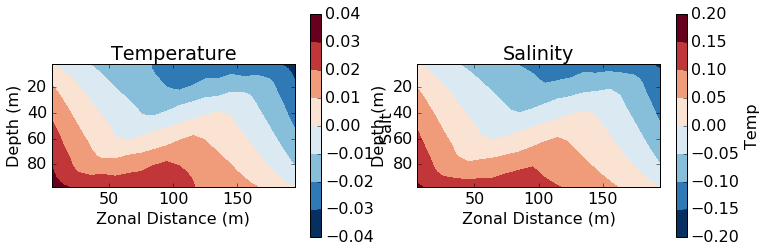

In [17]:
initial_z = xarray.open_dataset('wright/Initial_state.nc', decode_times = False).mean(dim='lath')
initial_z.load()
initial_z.rename( { 'Temp':'temp', 'Salt':'salt', 'Layer':'zl', 'lonh':'xh' }, inplace=True )
linear_z = xarray.open_dataset('wright/prog.nc', decode_times = False).mean(dim='yh')
linear_z.load()
rename_vars = {'xh':'Zonal Distance (m)', 'zl':'Depth (m)', 'temp':'Temp','salt':'Salt'}
#initial_z['zl'] = linear_z['zl']
initial_z.rename(rename_vars,inplace=True)
linear_z.rename(rename_vars,inplace=True)


plt.figure(figsize=(12,4))
ax = plt.subplot(1,2,1)
(initial_z.Salt[0,:,:]-linear_z.Salt[-1,:,:]).plot.contourf(levels=10); plt.gca().invert_yaxis();ax.set(adjustable='box-forced', aspect='equal')
plt.title('Temperature')
ax = plt.subplot(1,2,2)
(initial_z.Temp[0,:,:]-linear_z.Temp[-1,:,:]).plot.contourf(levels=10); plt.gca().invert_yaxis();ax.set(adjustable='box-forced', aspect='equal')
plt.title('Salinity')


In [18]:
linear_z['Depth (m)']

<xarray.DataArray 'Depth (m)' (Depth (m): 25)>
array([  2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,  42.,  46.,
        50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,  86.,  90.,  94.,
        98.])
Coordinates:
  * Depth (m)  (Depth (m)) float64 2.0 6.0 10.0 14.0 18.0 22.0 26.0 30.0 ...
Attributes:
    long_name:       Layer pseudo-depth, -z*
    units:           meter
    cartesian_axis:  Z
    positive:        down

/home/ashao/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/ashao/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


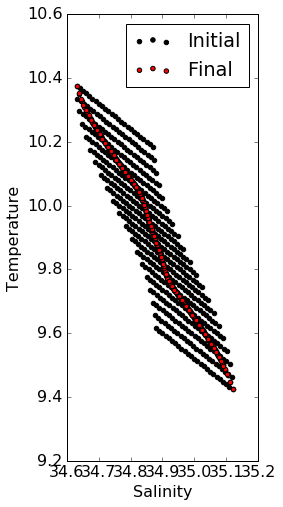

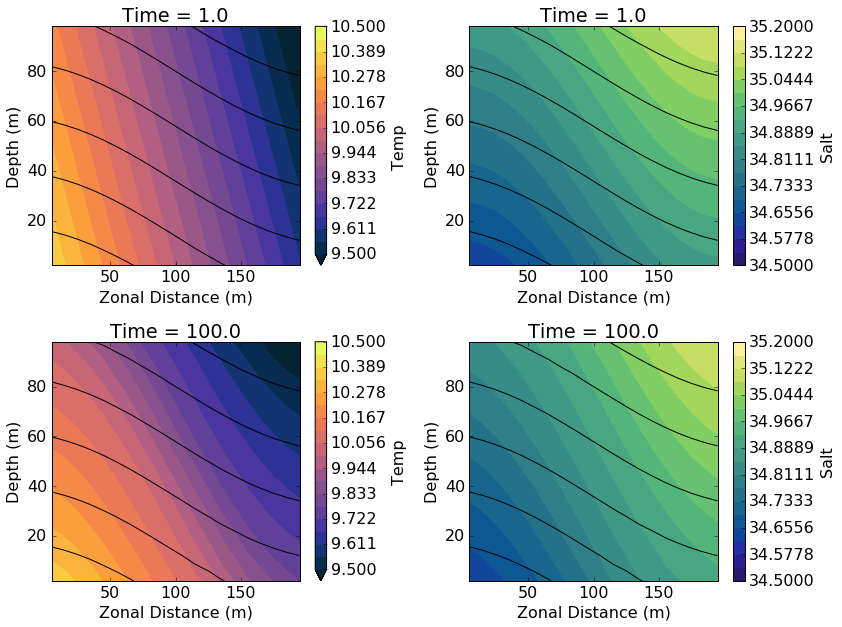

In [23]:
plt.figure(figsize=(8,8))
plt.scatter(initial_z.Salt,initial_z.Temp,s=20.,c='k',label='Initial')
plt.scatter(linear_z.Salt[-1,:,:],linear_z.Temp[-1,:,:],s=20.,c='r',label='Final')
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.legend()
# plt.gca().set(adjustable='box-forced', aspect='equal')

smin = 34.5 ; smax = 35.2
tmin = 9.5 ; tmax = 10.5

salt_opts = { 'levels':19, 'vmin':smin, 'vmax':smax, 'cmap':cmocean.cm.haline }
temp_opts = { 'levels':19, 'vmin':tmin, 'vmax':tmax, 'cmap':cmocean.cm.thermal }

plt.figure(figsize=(12,9))
idx = 1
plt.subplot(2,2,idx); idx += 1
xarray.plot.contourf(initial_z.Temp[0,:,:],**temp_opts); plt.gca().invert_yaxis()
linear_z['rhoinsitu'][0,...].plot.contour(colors='k',levels=10)
plt.subplot(2,2,idx); idx += 1
xarray.plot.contourf(initial_z.Salt[0,:,:],**salt_opts); plt.gca().invert_yaxis()
linear_z['rhoinsitu'][0,...].plot.contour(colors='k',levels=10)
plt.tight_layout()
plt.subplot(2,2,idx); idx += 1
xarray.plot.contourf(linear_z.Temp[-1,:,:],**temp_opts); plt.gca().invert_yaxis()
linear_z['rhoinsitu'][-1,...].plot.contour(colors='k',levels=10)
plt.subplot(2,2,idx); idx += 1
xarray.plot.contourf(linear_z.Salt[-1,:,:],**salt_opts); plt.gca().invert_yaxis()
linear_z['rhoinsitu'][-1,...].plot.contour(colors='k',levels=10)

plt.tight_layout()


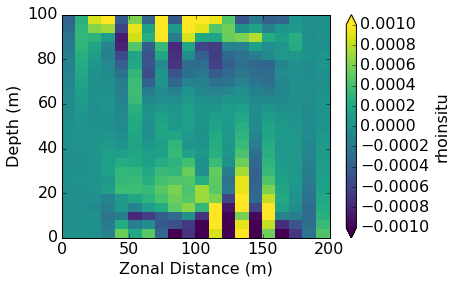

In [22]:
(linear_z['rhoinsitu'][-1,...]-linear_z['rhoinsitu'][0,...]).plot(vmin=-0.001,vmax=0.001)

In [21]:
linear_z['rhoinsitu'][-1,...].max()-linear_z['rhoinsitu'][0,...].min()

<xarray.DataArray 'rhoinsitu' ()>
array(0.9768592277271182)

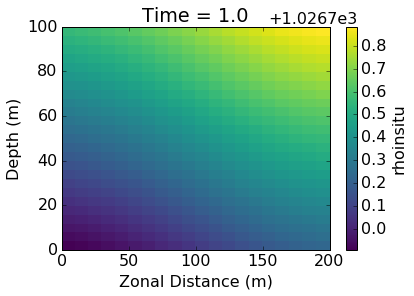

In [7]:
linear_z['rhoinsitu'][0,...].plot()